# Import Libraries


In [467]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')
import seaborn as sns

# Load the Data

In [ ]:
df = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)
df.head()

# Data Preparation

In [ ]:
# Remove columns that are not informative to us for visualization
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# check the shape
df.shape

In [466]:
# Rename some features so that they make sense
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [ ]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df.columns)

In [ ]:
df.columns = list(map(str, df.columns))
# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)

In [ ]:
# Set the country name as index useful for quickly looking up countries using .loc method
df.set_index('Country', inplace=True)
df.head()

In [ ]:
# Add total column
df['Total'] = df.sum(axis=1)
df.head()


# Visualizing Top 5 countries by Area plots

In [ ]:
years = list(map(str, range(1980, 2014)))
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
# Get the top 5 countries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

In [ ]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# Visualizing 3 random countries by Histogram

In [ ]:
# Prepare the data
# Selecting another 3 countries to view them in a histogram plot
df_n3=df.loc[['Egypt','Greece','Iceland'],years].transpose()
# Let's view our data
df_n3.head()

In [ ]:
df_n3.plot(kind='hist', figsize=(10, 6))
plt.title('Histogram of Immigration from Egypt, Greece and Iceland from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

# Visualizing Developed/ing countries by Bar Charts

In [ ]:
# Prepare the data
df_dev = df.groupby('DevName', axis=0).sum()
df_dev.drop(['Total'], axis=1, inplace=True)
df_dev=df_dev.transpose()
df_deved = df_dev['Developed regions']
df_deving = df_dev['Developing regions']

In [ ]:
#Visualizing Developed countries
df_deved.plot(kind='bar', figsize=(10, 6), rot=90,color='dimgrey')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Developed countries Immigrants to Canada from 1980 to 2013')
# Annotate arrow
plt.annotate('',                      
             xy=(0, 0),             
             xytext=(0, 0),         
             xycoords='data',        
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3',
                             color='red', lw=1))
plt.annotate('',
             xy=(0, 0),rotation=302,va='bottom',ha='left')
plt.show()

In [ ]:
#Visualizing Developing countries
df_deving.plot(kind='bar', figsize=(10, 6), rot=90,color='dimgrey')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Developing countries Immigrants to Canada from 1980 to 2013')
# Annotate arrow
plt.annotate('',                      
             xy=(0, 0),             
             xytext=(0, 0),         
             xycoords='data',        
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3',
                             color='red', lw=1))
plt.annotate('',
             xy=(0, 0),rotation=302,va='bottom',ha='left')
plt.show()

# Visualizing Continents by Pie Chart

In [ ]:
# group countries by continents and apply sum() function 
df_continents = df.groupby('Continent', axis=0).sum()

df_continents.head()

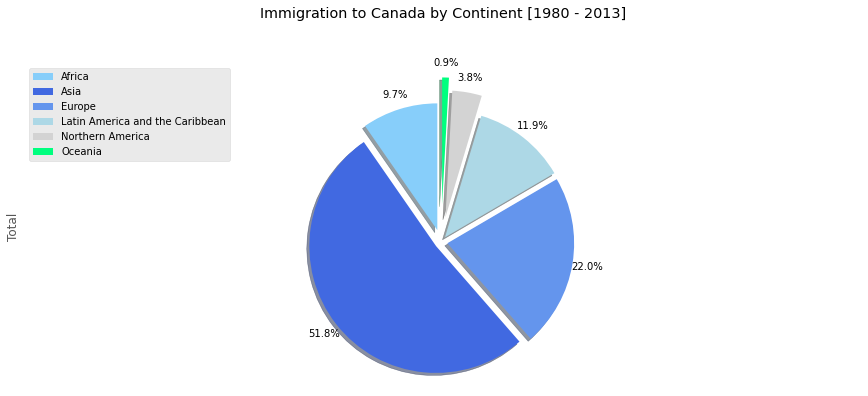

In [468]:
#Kindly find the below color list names:
# https://python-graph-gallery.com/python-colors/
colors_list = ['lightskyblue', 'royalblue', 'cornflowerblue', 'lightblue', 'lightgrey', 'springgreen']
explode_list = [0.1, 0.05, 0.05, 0.05, 0.2, 0.3] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn of labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()